# Loading Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib

# Loading Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [3]:
PATH='/kaggle/input/fake-and-real-news-dataset'
TRUE_FILE_PATH=os.path.join(PATH,'True.csv')
FAKE_FILE_PATH=os.path.join(PATH,'Fake.csv')

In [4]:
true_data_df=pd.read_csv(TRUE_FILE_PATH)
true_class=['True' for index in range(true_data_df.shape[0])]
fake_data_df=pd.read_csv(FAKE_FILE_PATH)
fake_class=['Fake' for index in range(fake_data_df.shape[0])]

# Exploratory Data Analysis and pre processing

In [5]:
labels=['True','Fake']
class_wise_counts=[true_data_df.shape[0],fake_data_df.shape[0]]

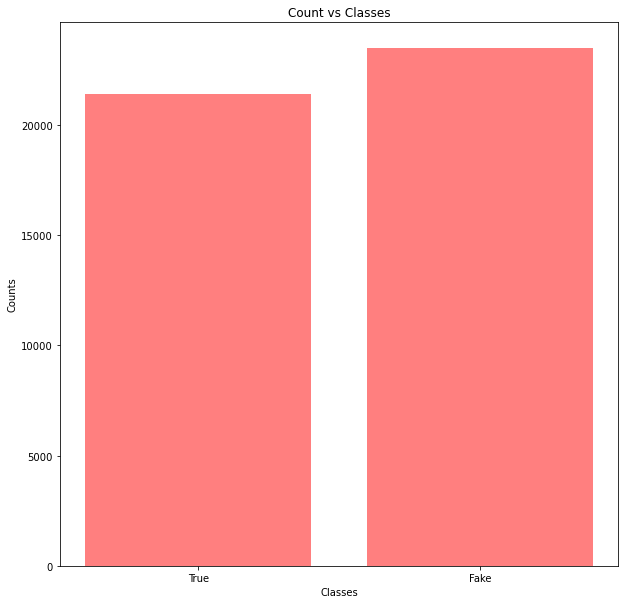

Ratio of fake is to real news: 1.0963720409020872


In [6]:
matplotlib.rcParams['figure.figsize']=(10,10)
plt.bar(labels,class_wise_counts,align='center', alpha=0.5,color='r')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Count vs Classes')
plt.show()
print ("Ratio of fake is to real news:",(fake_data_df.shape[0]/true_data_df.shape[0]))

In [7]:
true_data_df['class']=true_class
fake_data_df['class']=fake_class

In [8]:
fake_data_df['class']=fake_class

In [9]:
true_data_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [10]:
fake_data_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [11]:
data_frame=pd.concat([true_data_df,fake_data_df],axis='rows')

In [12]:
data_frame.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
data_frame.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [14]:
data_frame.date.value_counts()

December 20, 2017     182
December 6, 2017      166
November 30, 2017     162
November 9, 2017      158
October 13, 2017      155
                     ... 
August 21, 2016         1
14-Feb-18               1
September 3, 2016       1
December 9, 2017        1
November 20, 2017       1
Name: date, Length: 2397, dtype: int64

## Date contains a lot of unique values so not much value can be extracted from it hence dropping it for now

In [15]:
data_frame.drop('date',axis='columns',inplace=True)

In [16]:
data_frame.head()

,title,text,subject,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True


## Looking in subject feature 

In [17]:
data_frame.subject.unique()

array(['politicsNews', 'worldnews', 'News', 'politics', 'Government News',
       'left-news', 'US_News', 'Middle-east'], dtype=object)

In [18]:
real_news_df=data_frame[data_frame.subject=='politicsNews']

In [19]:
real_news_df.shape

(11272, 4)

In [20]:
(fake_subject_keys,fake_counts)=np.unique(data_frame[data_frame['class']=='Fake'].subject,return_counts=True)
(true_subject_keys,true_counts)=np.unique(data_frame[data_frame['class']=='True'].subject,return_counts=True)

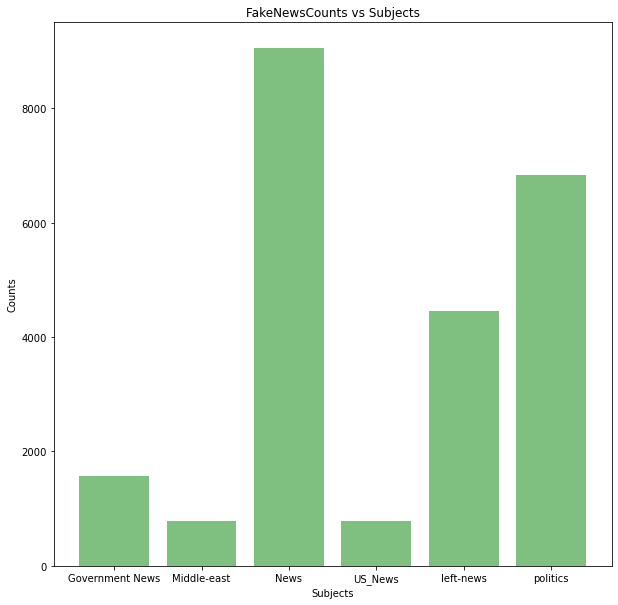

In [21]:
matplotlib.rcParams['figure.figsize']=(10,10)
plt.bar(fake_subject_keys,fake_counts,align='center', alpha=0.5,color='g')
plt.xlabel('Subjects')
plt.ylabel('Counts')
plt.title('FakeNewsCounts vs Subjects')
plt.show()

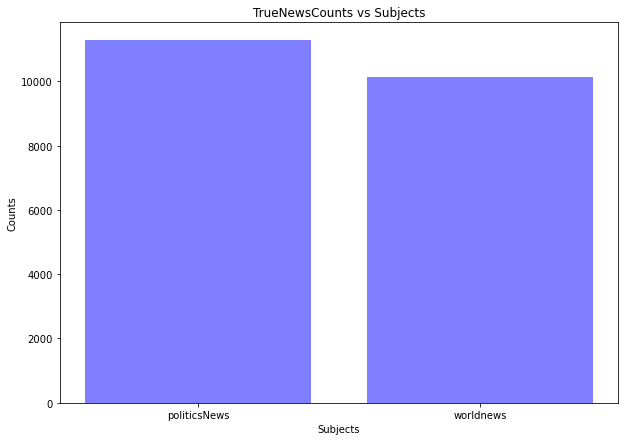

In [22]:
matplotlib.rcParams['figure.figsize']=(10,7)
plt.bar(true_subject_keys,true_counts,align='center', alpha=0.5,color='b')
plt.xlabel('Subjects')
plt.ylabel('Counts')
plt.title('TrueNewsCounts vs Subjects')
plt.show()

## So only politicalNews and worldnews are giving true news remaning all of them are giving fake news

## Converting the subject feature into one hot encoded features

In [23]:
subject_dummies=pd.get_dummies(data_frame.subject)

In [24]:
data_frame2=pd.concat([data_frame,subject_dummies],axis='columns')

## Cleaning the title and text seperatly

In [25]:
title_column=list(data_frame2.title)
text_column=list(data_frame2.text)

In [26]:
title_column[0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

## Cleaning the title and text columns using NLTK

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [28]:
stop_words=stopwords.words('english')
stop_words.extend(string.punctuation)

In [29]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [30]:
lemmatizer=WordNetLemmatizer()

def clean_data(text):
    
    clean_words=[]
    words=word_tokenize(text)
    for word in words:
        if (word.lower() not in stop_words and word.isdigit()==False):
            curr_word_pos_tag=pos_tag([word])
            
            simple_pos_tag=get_wordnet_pos(curr_word_pos_tag[0][1])
            clean_words.append(lemmatizer.lemmatize(word,simple_pos_tag))
    return clean_words

clean_title_column=[clean_data(current_column) for current_column in title_column]


In [31]:
clean_title_column[0]

['U.S.', 'budget', 'fight', 'loom', 'Republicans', 'flip', 'fiscal', 'script']

In [32]:
clean_text_column=[clean_data(current_column) for current_column in text_column]

## Now we have a list of list where each item contains the words that are not stop words in the current text.

## Vectorising them so that important words can be extracted from it for converting into features

In [33]:
clean_title_column_list=[" ".join(list_words) for list_words in clean_title_column]
clean_text_column_list=[" ".join(list_words) for list_words in clean_text_column]

In [34]:
data_frame2['title']=clean_title_column_list
data_frame2['text']=clean_text_column_list

## Shuffling the dataframe so that we can split into train and test sets

In [35]:
from sklearn.utils import shuffle
data_frame3 = shuffle(data_frame2)

In [36]:
data_frame3.reset_index(inplace=True, drop=True)

## Splitting the data into 75% for training and 25% for testing

In [37]:
train_dataframe=data_frame3.loc[:int(0.75*data_frame3.shape[0]),:]

In [38]:
test_dataframe=data_frame3.loc[int(0.75*data_frame3.shape[0]):,:]


In [39]:
yTrain=list(train_dataframe['class'])
yTest=list(test_dataframe['class'])

## Since the subject features 'class' and 'subject' have already been taken care of hence dropping them. 

In [40]:
train_dataframe.drop(['class','subject'],axis=1,inplace=True)
test_dataframe.drop(['class','subject'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
test_dataframe.reset_index(inplace=True,drop=True)
test_dataframe.head()

,title,text,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
0,Trump BEGGED Singer Perform Inauguration Told ...,Donald Trump inauguration festivity look spiff...,0,0,1,0,0,0,0,0
1,BREAKING OBAMA VETO BILL Unanimously Passed Co...,come surprise one Yesterday 15th anniversary b...,0,0,0,0,0,1,0,0
2,No-one wreck democracy Schaueble tell Germans,BERLIN Reuters Germany depart finance minister...,0,0,0,0,0,0,0,1
3,HORRIFIC Human Trafficking Case PEOPLE FOUND D...,Anyone take part type sub-human criminal activ...,0,0,0,0,0,1,0,0
4,Egypt 's Sisi say spoke Donald Trump telephone...,CAIRO Reuters Egyptian President Abdel Fattah ...,0,0,0,0,0,0,1,0


In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [43]:
train_title_column=list(train_dataframe['title'])
train_text_column=list(train_dataframe['text'])
test_title_column=list(test_dataframe['title'])
test_text_column=list(test_dataframe['text'])

In [44]:
train_dataframe.drop(['title','text'],axis=1,inplace=True)
test_dataframe.drop(['title','text'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Vectorisation for 'title' feature

In [45]:
count_vec=CountVectorizer(max_features=5000,ngram_range=(1,2))

In [46]:
train_title_sparse_matrix=count_vec.fit_transform(train_title_column)

In [47]:
test_title_sparse_matrix=count_vec.transform(test_title_column)

In [48]:
test_title_sparse_matrix.shape

(11225, 5000)

## Converting the sparse matrix to dataframe for train and test set

In [49]:
train_dataframe_title = pd.DataFrame.sparse.from_spmatrix(train_title_sparse_matrix,columns=count_vec.get_feature_names())

In [50]:
test_dataframe_title=pd.DataFrame.sparse.from_spmatrix(test_title_sparse_matrix,columns=count_vec.get_feature_names())

In [51]:
train_dataframe_title.head()

,000,10,10 000,100,11,12,14,15,19,20,...,zealand,zero,zika,zika funding,zimbabwe,zimbabwe mugabe,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_dataframe_title.head()

,000,10,10 000,100,11,12,14,15,19,20,...,zealand,zero,zika,zika funding,zimbabwe,zimbabwe mugabe,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Adding the features extracted from the 'title' column as features to the train and test set

In [53]:
train_dataframe1=pd.concat([train_dataframe,train_dataframe_title],axis='columns')

In [54]:
train_dataframe1.head()

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,000,10,...,zealand,zero,zika,zika funding,zimbabwe,zimbabwe mugabe,zone,zor,zuckerberg,zuma
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test_dataframe1=pd.concat([test_dataframe,test_dataframe_title],axis='columns')

In [56]:
test_dataframe1.head()

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,000,10,...,zealand,zero,zika,zika funding,zimbabwe,zimbabwe mugabe,zone,zor,zuckerberg,zuma
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vectorisation for 'text' Column

In [57]:
count_vec_text=CountVectorizer(max_features=5000,ngram_range=(1,2))

In [58]:
train_text_sparse_matrix=count_vec_text.fit_transform(train_text_column)

In [59]:
test_text_sparse_matrix=count_vec_text.transform(test_text_column)

## Converting the sparse matrix to train and test set

In [60]:
train_dataframe_text = pd.DataFrame.sparse.from_spmatrix(train_text_sparse_matrix,columns=count_vec_text.get_feature_names())

In [61]:
train_dataframe_text.head()

,00,00 pm,000,000 people,10,10 000,100,100 000,11,12,...,youtu be,youtube,youtube com,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
test_dataframe_text=pd.DataFrame.sparse.from_spmatrix(test_text_sparse_matrix,columns=count_vec_text.get_feature_names())

In [63]:
test_dataframe_text.head()

,00,00 pm,000,000 people,10,10 000,100,100 000,11,12,...,youtu be,youtube,youtube com,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Adding the features extracted from 'text' column to the train and test set

In [64]:
train_dataframe2=pd.concat([train_dataframe1,train_dataframe_text],axis='columns')

In [65]:
test_dataframe2=pd.concat([test_dataframe1,test_dataframe_text],axis='columns')

In [66]:
train_dataframe2.head()

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,000,10,...,youtu be,youtube,youtube com,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
test_dataframe2.head()

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,000,10,...,youtu be,youtube,youtube com,zealand,zero,zika,zimbabwe,zone,zor,zuma
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
train_dataframe2.isnull().sum()

Government News    0.0
Middle-east        0.0
News               0.0
US_News            0.0
left-news          0.0
                  ... 
zika               0.0
zimbabwe           0.0
zone               0.0
zor                0.0
zuma               0.0
Length: 10008, dtype: float64

In [69]:
test_dataframe2.isnull().sum()

Government News    0.0
Middle-east        0.0
News               0.0
US_News            0.0
left-news          0.0
                  ... 
zika               0.0
zimbabwe           0.0
zone               0.0
zor                0.0
zuma               0.0
Length: 10008, dtype: float64

In [70]:
train_dataframe2.shape

(33674, 10008)

In [71]:
test_dataframe2.shape

(11225, 10008)

In [72]:
train_dataframe2.shape,test_dataframe2.shape,yTrain.shape,yTest.shape

AttributeError: 'list' object has no attribute 'shape'

In [73]:
xTrain=train_dataframe2.values
xTest=test_dataframe2.values

In [74]:
xTrain.shape,xTest.shape,yTrain.shape,yTest.shape

AttributeError: 'list' object has no attribute 'shape'

# Training model

## Logisitc Regression

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(xTrain,yTrain)

LogisticRegression(max_iter=1000)

In [76]:
yPredicted=lr.predict(xTest)

In [77]:
lr.score(xTest,yTest)

0.9993763919821826

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
print (confusion_matrix(yTest,yPredicted))

[[5837    4]
 [   3 5381]]


In [80]:
print (classification_report(yTest,yPredicted))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5841
        True       1.00      1.00      1.00      5384

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
clf_rf=RandomForestClassifier()
clf_rf.fit(xTrain,yTrain)

RandomForestClassifier()

In [83]:
clf_rf.score(xTest,yTest)

0.9999109131403118

In [84]:
yPredicted_rf=clf_rf.predict(xTest)

In [85]:
print (confusion_matrix(yTest,yPredicted_rf))

[[5840    1]
 [   0 5384]]


In [86]:
print (classification_report(yTest,yPredicted_rf))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5841
        True       1.00      1.00      1.00      5384

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



## Multinomial Naive Bayes

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
clf_mnb=MultinomialNB()

In [89]:
clf_mnb.fit(xTrain,yTrain)

MultinomialNB()

In [90]:
clf_mnb.score(xTest,yTest)

0.9779064587973274

In [91]:
yPredicted_mnb=clf_mnb.predict(xTest)

In [92]:
confusion_matrix(yTest,yPredicted_mnb)

array([[5730,  111],
       [ 137, 5247]])

In [93]:
print (classification_report(yTest,yPredicted_mnb))

              precision    recall  f1-score   support

        Fake       0.98      0.98      0.98      5841
        True       0.98      0.97      0.98      5384

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225

